<a href="https://colab.research.google.com/github/vinaykumar0409/House-Price-Prediction/blob/main/House_Price_Prediction_(Basic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Step 1: Load and Understand the Dataset


In [155]:
#Load the dataset containing features of houses and their corresponding prices
house = pd.read_csv('housing.csv')
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Explore the dataset to understand the features, their types, and the target variable (house prices).

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [151]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [159]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [160]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##Step 2: Data Preprocessing

In [162]:
df = house.copy()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Handle missing values: Impute missing values or remove corresponding records.

In [163]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [164]:
df.dropna(inplace = True)

Encode categorical variables: Convert categorical variables into numerical representations

In [169]:
df = df.join(pd.get_dummies(df.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [180]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


##Step 3: Feature Selection

Create scatter plots or other visualizations to understand the relationship between individual features and the target variable.

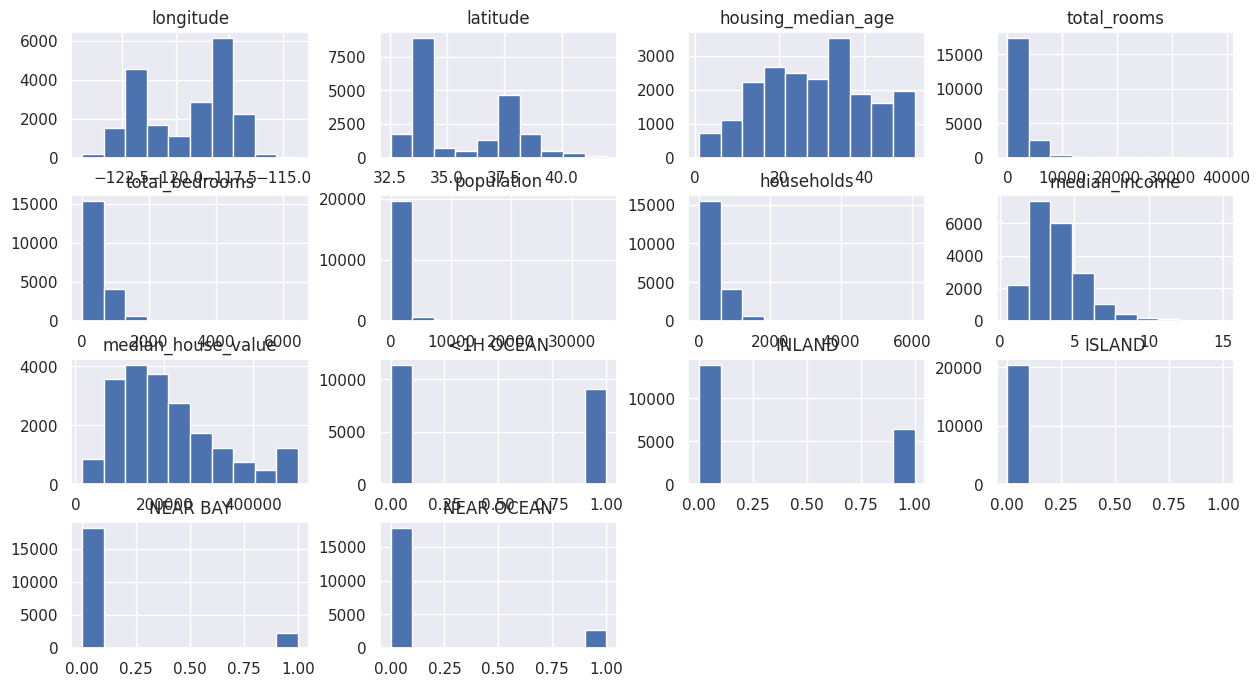

In [178]:
df.hist(figsize = (15,8))

a logarithmic transformation can help in reducing skewness and making the data distribution more symmetric

In [181]:
df['total_rooms'] = np.log(df['total_rooms']) + 1
df['total_bedrooms'] = np.log(df['total_bedrooms']) + 1
df['population'] = np.log(df['population']) + 1
df['households'] = np.log(df['households']) + 1

In [182]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.029888,0.060486,0.109012,0.055532,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.032500,-0.067948,-0.136321,-0.087902,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.313424,-0.270615,-0.242415,-0.240147,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.029888,-0.032500,-0.313424,1.000000,0.946108,0.864695,0.931841,0.205530,0.158311,0.020885,-0.012946,-0.007551,-0.016482,0.002850
total_bedrooms,0.060486,-0.067948,-0.270615,0.946108,1.000000,0.897548,0.974466,-0.025748,0.052926,0.041951,-0.045033,-0.001868,-0.016837,0.016298
population,0.109012,-0.136321,-0.242415,0.864695,0.897548,1.000000,0.932223,-0.004767,-0.021856,0.114959,-0.071830,-0.012834,-0.059256,-0.014404
households,0.055532,-0.087902,-0.240147,0.931841,0.974466,0.932223,1.000000,0.003663,0.072329,0.072486,-0.087183,-0.009148,-0.005839,0.019644
median_income,-0.015550,-0.079626,-0.118278,0.205530,-0.025748,-0.004767,0.003663,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.158311,0.052926,-0.021856,0.072329,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,0.020885,0.041951,0.114959,0.072486,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

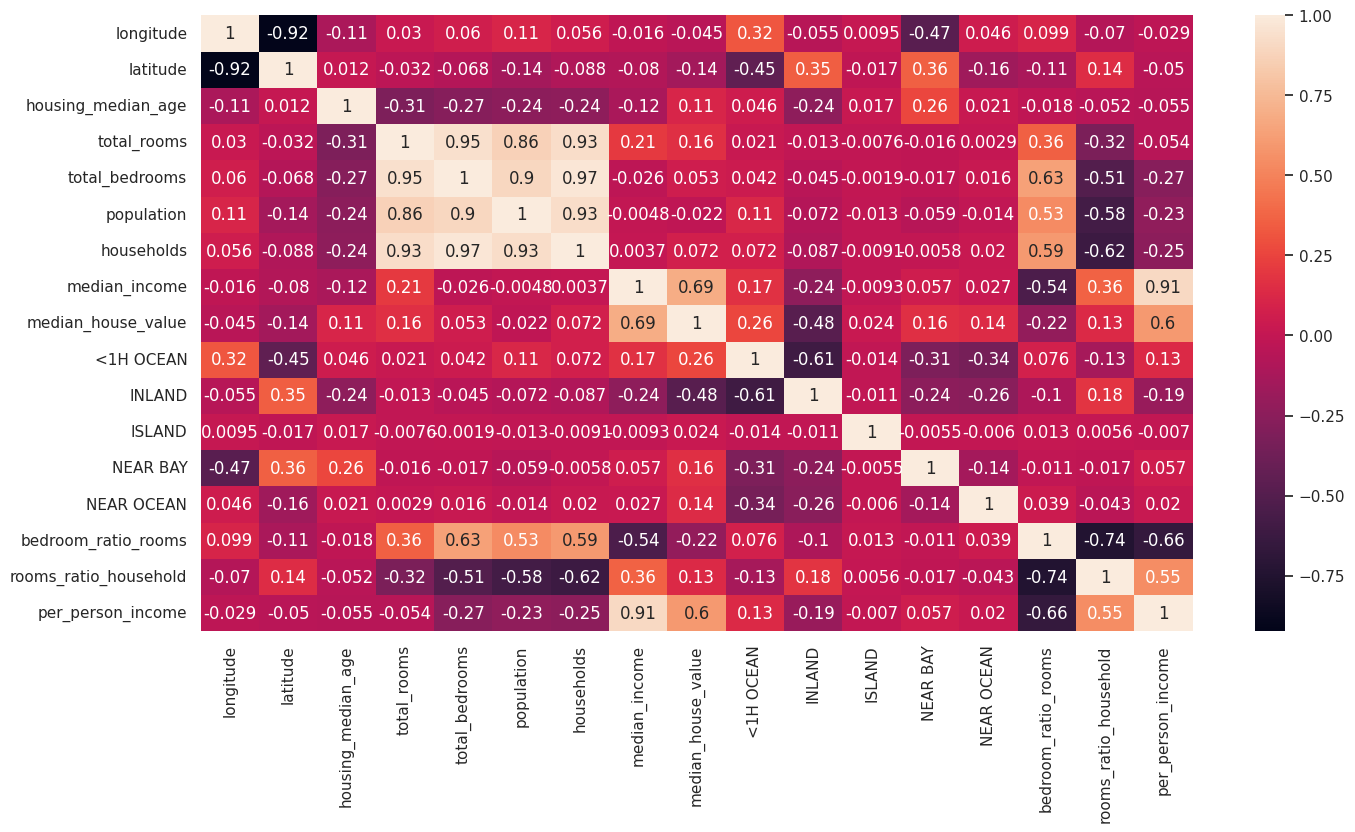

In [197]:
sns.heatmap(df.corr(), annot = True)

In [196]:
df['bedroom_ratio_rooms'] = df['total_bedrooms'] / df['total_rooms']
df['rooms_ratio_household'] = df['total_rooms'] / df['households']
df['per_person_income'] = df['median_income'] / df['households']

##Step 4: Split the Data

In [199]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [203]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X = scaler.fit_transform(X)
# normalized_y = scaler.fit_transform(y)

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Divide the dataset into training and testing sets. A common split ratio is 80% training and 20% testing.

In [210]:
#Divide the dataset into training and testing sets.
#A common split ratio is 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.02, random_state = 42)

##Step 5: Building the Multiple Linear Regression Model

In [211]:
#Create an instance of the Linear Regression model.

model = LinearRegression()

#Fit the model to the training data using the fit method.

model.fit(x_train, y_train)

LinearRegression()

##Step 6: Making Predictions

In [212]:
#Use the trained model to make predictions on the testing data using the predict method.
y_pred = model.predict(x_test)

##Step 7: Model Evaluation

In [213]:
#Compare the predicted prices with the actual prices in the testing set.

#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#R-squared
r2 = r2_score(y_test, y_pred)

In [214]:
print('Mean Squared Error:', mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared", r2)

Mean Squared Error: 4543508289.154591
Root Mean Squared Error: 67405.55087791057
R-Squared 0.6746168080445359


##Step 8: Interpretation

In [209]:
#Interpret the coefficients of the model to understand
#the impact of each feature on house prices.

slope = model.coef_
intercept = model.intercept_
print("Slope(m) :", slope)
print("Intercept(b) :", intercept)

Slope(m) : [ -28426.49890741  -27530.77632134    1105.80054456 -180782.31816126
  201842.3166793   -87796.71963087   95526.74880351   56928.50058171
  -17942.83053437  -49675.47674951  110834.19677451  -25126.47240762
  -18089.41708301 -899830.71423056  246287.89759598  -88721.26123912]
Intercept(b) : -1781009.9433806706
